In [50]:
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [51]:
file_path = './data/map/guj_dist.csv'
data = pd.read_csv(file_path)
df = pd.DataFrame(data)
df.head()

,name_of_city,population_total,location,lat,lon
0,Ahmadabad,5570585,"23.022505,72.5713621",23.022505,72.571362
1,Amreli,105980,"21.6031774,71.2220832",21.603177,71.222083
2,Anand,197351,"22.5645175,72.928871",22.564518,72.928871
3,Bharuch,168729,"21.7051358,72.9958748",21.705136,72.995875
4,Bhavnagar,593768,"21.7644725,72.1519304",21.764473,72.151930


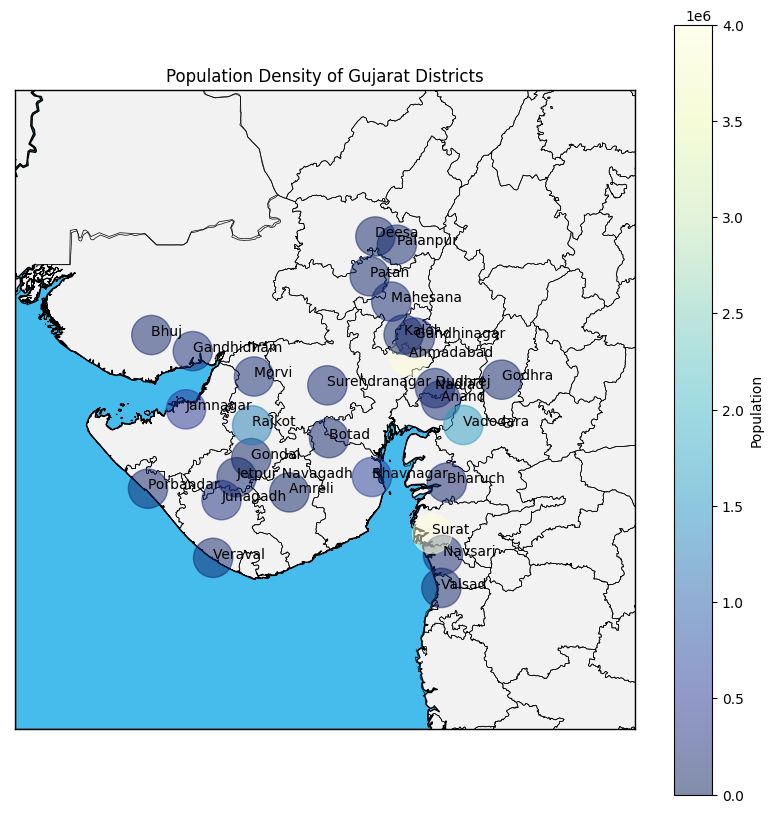

In [52]:
# # Plotting the map
latitudes = df['lat'].values
longitudes = df['lon'].values

margin = 1.5
lat_min = latitudes.min() - margin
lat_max = latitudes.max() + margin
lon_min = longitudes.min() - margin
lon_max = longitudes.max() + margin

fig , ax = plt.subplots(figsize=(10, 10))
m = Basemap(
    projection='merc',
    llcrnrlat=lat_min,
    urcrnrlat=lat_max,
    llcrnrlon=lon_min,
    urcrnrlon=lon_max,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True
)
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.readshapefile('./data/map/2011_Dist', '2011_Dist')

# # Plotting the points
x, y = m(longitudes, latitudes)
pop = df['population_total'].values
dist = df['name_of_city'].values
m.scatter(x, y, s=800, zorder=2, c=pop,alpha=0.5, cmap='YlGnBu_r')
plt.colorbar(label='Population')
plt.clim(0, 4000000)

for i in range(len(x)):
    # plt.text(x[i], y[i]-12000, df['population_total'][i], fontsize=8, color='r')
    plt.text(x[i], y[i], df['name_of_city'][i], fontsize=10)

ax.set_title ('Population Density of Gujarat Districts')
plt.show()